In [10]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nba_heights = [196, 191, 198, 216, 188, 185, 211, 201,188, 191, 201, 208, 191, 183, 196]
simu_heights = []
for i in range(1000):
    bootstrap_sample = random.choices(nba_heights, k = 15)  # 
    simu_heights.append(bootstrap_sample)
upper = np.quantile(simu_heights, 0.975)
lower = np.quantile(simu_heights, 0.024)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
bag1 = [[1, 2, 3, 6, 6, 6], [1, 2, 3, 4, 4, 6], [1, 2, 3, 3, 3, 5]]
bag2 = [[2, 2, 3, 4, 5, 6], [3, 3, 3, 4, 4, 5], [1, 1, 2, 4, 5, 5]]

In [6]:
result = {}
bag_index = random.randint(0, 1)
# Obtain the dice indices
dice_index1 = random.randint(0,5)
dice_index2 = random.randint(0,5)
# Sample a pair of dice from bag1 and bag2
point1 = bag1[bag_index][dice_index1]
point2 = bag2[bag_index][dice_index2]
key = "%s_%s" % (point1,point2)

In [7]:
print(key)

2_3


In [8]:
result[key] = 1

In [9]:
print(result)

{'2_3': 1}


**Paired dice simulation**


Similar to the example in the lesson, you will roll two dice from two bags, and each bag contains three biased dice.
```python
bag1 = [[1, 2, 3, 6, 6, 6], [1, 2, 3, 4, 4, 6], [1, 2, 3, 3, 3, 5]]
bag2 = [[2, 2, 3, 4, 5, 6], [3, 3, 3, 4, 4, 5], [1, 1, 2, 4, 5, 5]]
```
The difference is that the dice in the two bags are paired: if you pick the second die in bag1, you will also pick the second die in bag2. In each trial:

You pick one pair of dice from the two bags randomly and roll them
Success occurs if the points on dice1 and dice2 add up to eight; otherwise, failure
Your task is to complete the for-loop in the ```python roll_paired_biased_dice()``` function and to use this function to calculate the probabilities of success for each unique combination of points on dice1 and dice2.


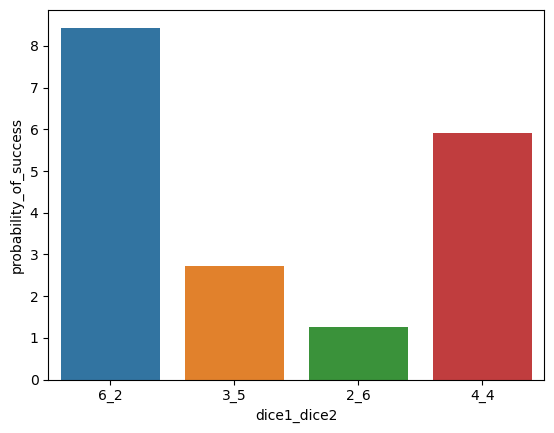

In [12]:
bag1 = [[1, 2, 3, 6, 6, 6], [1, 2, 3, 4, 4, 6], [1, 2, 3, 3, 3, 5]]
bag2 = [[2, 2, 3, 4, 5, 6], [3, 3, 3, 4, 4, 5], [1, 1, 2, 4, 5, 5]]


def roll_paired_biased_dice(n, seed=1231):
    random.seed(seed)
    results={}
    for i in range(n):
        bag_index = random.randint(0, 1)
        # Obtain the dice indices
        dice_index1 = random.randint(0,5)
        dice_index2 = random.randint(0,5)
        # Sample a pair of dice from bag1 and bag2
        point1 = bag1[bag_index][dice_index1]
        point2 = bag2[bag_index][dice_index2]
        key = "%s_%s" % (point1,point2)
        if point1 + point2 == 8: 
            if key not in results:
                results[key] = 1
            else:
                results[key] += 1
    return(pd.DataFrame.from_dict({'dice1_dice2':results.keys(),'probability_of_success':np.array(list(results.values()))*100.0/n}))

# Run the simulation 10,000 times and assign the result to df_results
df_results = roll_paired_biased_dice(10000, seed=1231)
sns.barplot(x="dice1_dice2", y="probability_of_success", data=df_results)
plt.show()


**Simulation steps**

1. Define the input variables and pick probability distribution for them

2. Genearte inputs by sampling from these distributions

3. Perform a deterministic calculation of the simulated inputs

4. Summarize results

**Deterministic calculation on PI**

In this exercise and the next, you'll play around with the pi calculations from the video to further understand the importance of each step in the simulation process.

Recall that the simulation to find pi generates random points $(x,y)$ where $x$ and $y$ are between -1 and 1, as shown in the graph below.

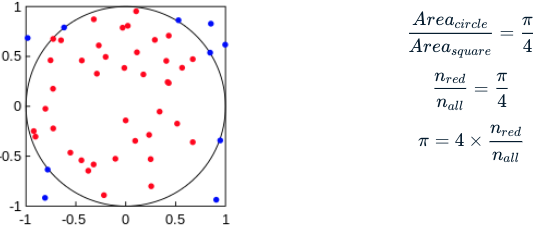

In [16]:
n = 1000000
circle_points = 0 
square_points = 0 
for i in range(n):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    dist_from_origin = x ** 2 + y ** 2
    # Increment circle_points for any point with a distance from origin of less than .75
    if dist_from_origin <= 1:
        circle_points += 1
    square_points += 1
pi = 4 * circle_points / square_points
print(pi)

3.141872
